In [1]:
import sys
dir_repo = '../'
sys.path.append(dir_repo)

from galaxy_generator.utils import get_config_from_yaml
from galaxy_generator.dcgan_generator import DCGAN_Generator

! rm -rf /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/TestDCGAN/

In [2]:
config = get_config_from_yaml(dir_repo+'configs/dcgan_test.yaml')
generator = DCGAN_Generator(config=config)


------ Parameters ------

exp_name : TestDCGAN
cuda : True
ngpu : 1
gpu_device : 0
workers : 2
dir_image : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images
file_csv : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/gz2_all_small_v2.csv
label_tag : label_8
num_classes : 8
class_weights : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
seed : 3
norm_mean : [0.094, 0.0815, 0.063]
norm_std : [0.1303, 0.11, 0.0913]
crop_size : 224
input_size : 64
n_channel : 3
n_zlatent : 50
n_filter_G : 64
n_filter_D : 64
num_epochs : 6
batch_size : 16
lr_G : 0.0002
lr_D : 0.0002
beta1 : 0.5
beta2 : 0.999
step_size_G : 2
step_size_D : 2
gamma_G : 0.1
gamma_D : 0.1
dir_output : /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments
nrow : 4
dpi : 400
freq_img : 10

------ Prepare Data ------

Number of training galaxies: 1000 (63 batches)

------ Build Model ------

Number of trainable parameters
Generator  : 3167104
Discriminator  : 3167104


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


## --- training --- 

In [3]:
from tqdm.notebook import tqdm

generator.train()


------ Create experiment directory ------

Training information will be stored at :
 	 /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/TestDCGAN

[1/6 epoch] [1 iter]	 loss_D: 2.341 	 loss_G: 2.697	 D(x):0.215 	 D(G(z)): 0.326 / 0.075
	Training at epoch-0 | avg. netD loss: 0.141 | avg. netG loss 8.846
	Run time per epoch: 0m 13s
[2/6 epoch] [64 iter]	 loss_D: 0.003 	 loss_G: 24.798	 D(x):0.997 	 D(G(z)): 0.000 / 0.000
	Training at epoch-1 | avg. netD loss: 1.323 | avg. netG loss 11.164
	Run time per epoch: 0m 13s
[3/6 epoch] [127 iter]	 loss_D: 0.480 	 loss_G: 4.000	 D(x):0.679 	 D(G(z)): 0.030 / 0.034
	Training at epoch-2 | avg. netD loss: 0.459 | avg. netG loss 2.467
	Run time per epoch: 0m 12s
[4/6 epoch] [190 iter]	 loss_D: 0.230 	 loss_G: 2.535	 D(x):0.953 	 D(G(z)): 0.157 / 0.096
	Training at epoch-3 | avg. netD loss: 0.334 | avg. netG loss 2.716
	Run time per epoch: 0m 13s
[5/6 epoch] [253 iter]	 loss_D: 0.279 	 loss_G: 1.922	 D(x):0.970 	 D(G(z)): 0.207 /

### --- check training logs ---

In [4]:
import pickle

print(f'open file : {generator.file_trainInfo}')
trainInfo = pickle.load(file = open(generator.file_trainInfo, 'rb'))

open file : /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/TestDCGAN/trainInfo.pkl


In [5]:
trainInfo.keys()

dict_keys(['loss_G', 'loss_D', 'epoch_loss_G', 'epoch_loss_D', 'lr_G', 'lr_D'])

### Plot training losses

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

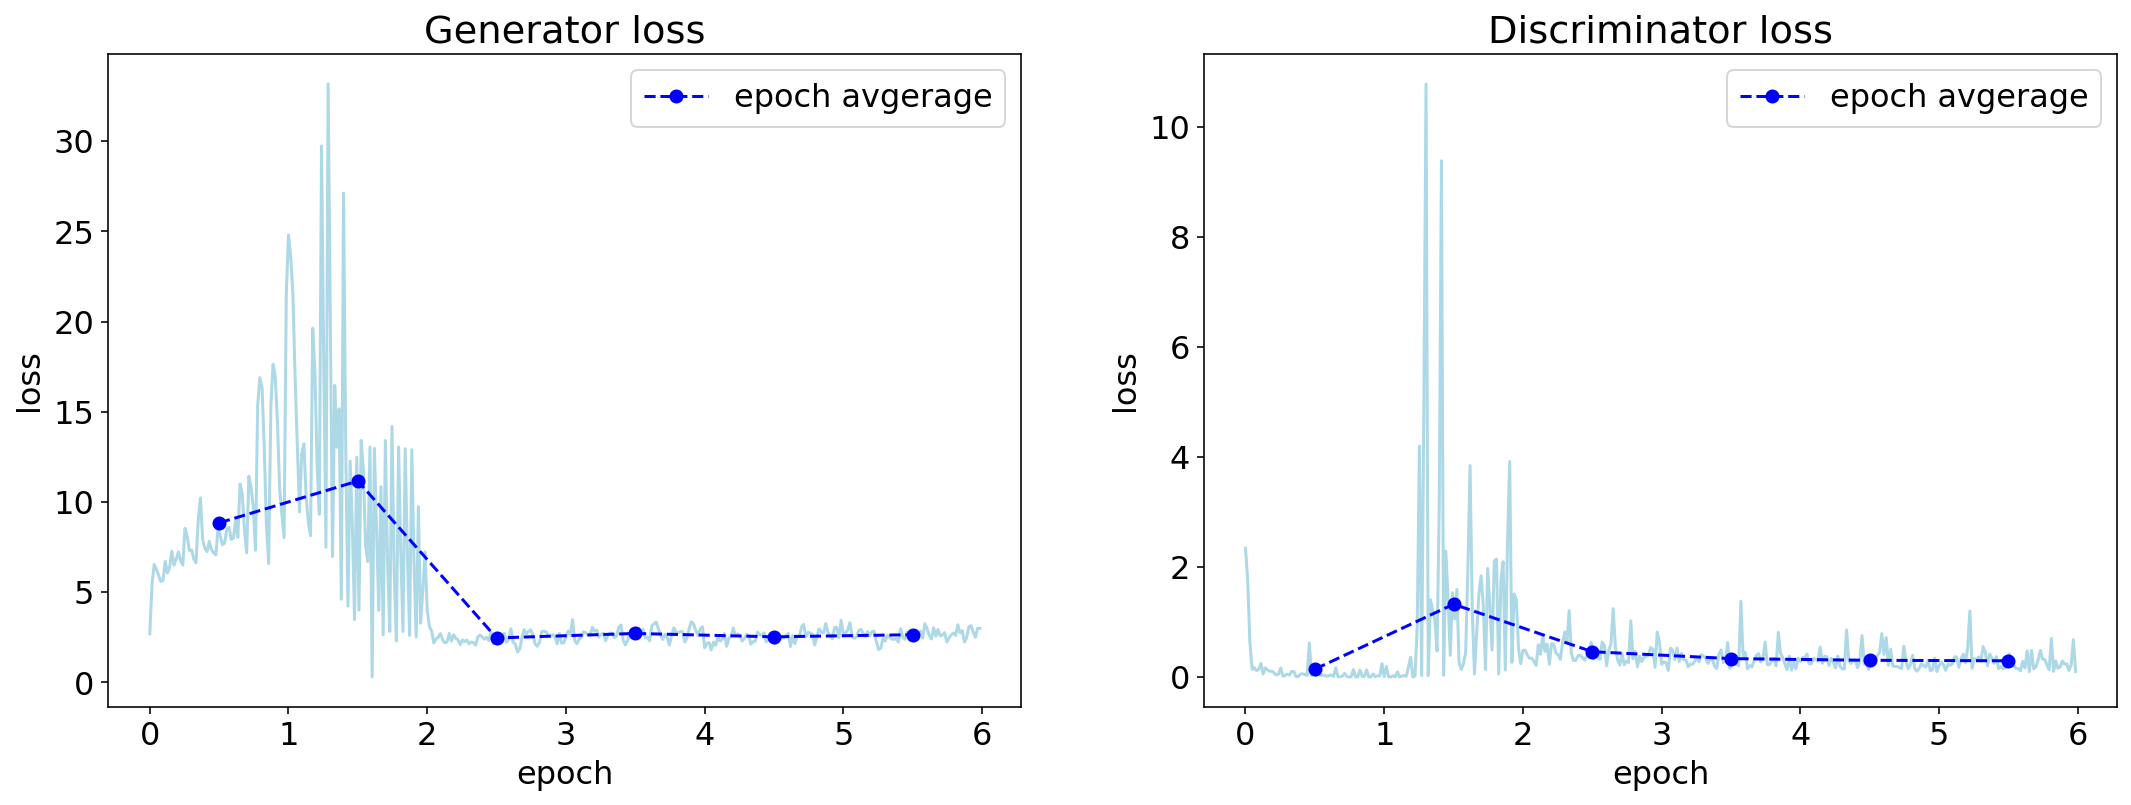

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rc('font', size=16)

iter_tick = np.array(range(len(trainInfo['loss_G'])))/len(generator.dataloader)

epoch_tick = np.array(range(len(trainInfo['epoch_loss_G'])))+0.5

ax[0].plot(iter_tick, trainInfo['loss_G'], color='lightblue')
ax[0].plot(epoch_tick, trainInfo['epoch_loss_G'], 'o--', label='epoch avgerage', color='b')

ax[1].plot(iter_tick, trainInfo['loss_D'], color='lightblue')
ax[1].plot(epoch_tick, trainInfo['epoch_loss_D'], 'o--', label='epoch avgerage', color='b')

ax[0].set_title(f'Generator loss')
ax[1].set_title(f'Discriminator loss')


for i in range(2):
    ax[i].set_ylabel('loss')
    ax[i].set_xlabel('epoch')
    ax[i].legend()

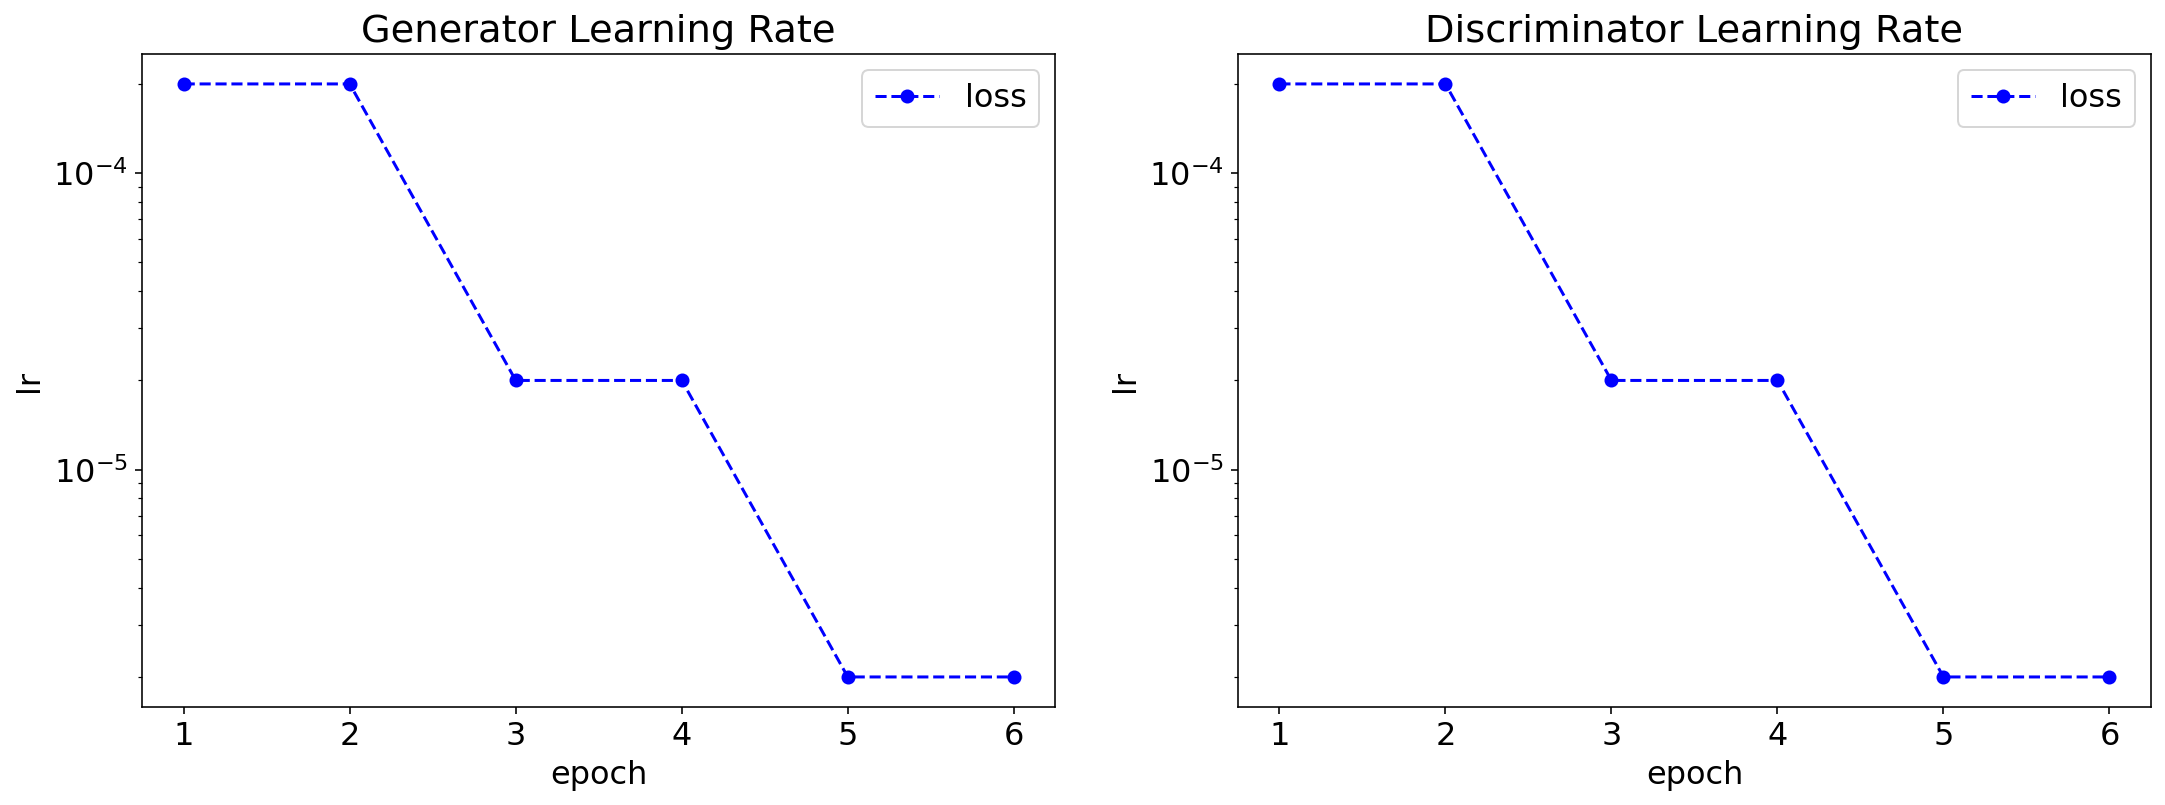

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rc('font', size=16)

epoch_tick = np.array(range(len(trainInfo['lr_G']))) + 1

ax[0].plot(epoch_tick, trainInfo['lr_G'], 'o--', label='loss', color='b')

ax[1].plot(epoch_tick, trainInfo['lr_D'], 'o--', label='loss', color='b')

ax[0].set_title(f'Generator Learning Rate')
ax[1].set_title(f'Discriminator Learning Rate')


for i in range(2):
    ax[i].set_yscale('log')
    ax[i].set_ylabel('lr')
    ax[i].set_xlabel('epoch')
    ax[i].legend()